In [3]:
import numpy as np
import scipy.linalg
import scipy

p = 10
all_num = int(p*(p+1)/2)
xx_id = []
yy_id = []

for i in range(p):
    for j in range(i,p):
        xx_id.append(i)
        yy_id.append(j)

xx_id = np.array(xx_id)
yy_id = np.array(yy_id)

In [4]:

xs = []

p = 10

id_mat = np.zeros((all_num*all_num))
eq_id = 1

for i1 in range(all_num):
    for j1 in range(i1+1,all_num):
        i = xx_id[i1]
        m = yy_id[i1]
        k = xx_id[j1]
        j = yy_id[j1]
        if i+m==k+j:
            x = np.zeros(p,)
            x[i] = x[i] + 1; 
            x[m] = x[m] + 1; 
            x[j] = x[j] - 1;
            x[k] = x[k] - 1;
            xs.append(x)
            id_mat[i1*all_num+j1] = eq_id
            eq_id = eq_id + 1

xs = np.array(xs, dtype=np.int)

/var/folders/6j/b6y80djd4nb5hl73rv3sv8y80000gn/T/ipykernel_29097/3805557949.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xs = np.array(xs, dtype=np.int)


In [5]:
ss = []
eigs_0 = []
eigs_1 = []
eigs_2 = []

for i in range(1,all_num+1):
    n_trial = 10000
    success = 0
    eig0 = 0
    eig1 = 0
    eig2 = 0
    for j in range(n_trial):
        train_id = np.random.choice(all_num,i,replace=False)
        eq_ids = id_mat[((train_id*all_num)[:,np.newaxis] + train_id[np.newaxis,:]).reshape(-1,)].astype(int)
        eq_ids = np.unique(eq_ids)[1:] - 1
        indices = eq_ids
        
        mat = xs[indices]
        gram = np.matmul(np.transpose(mat), mat)
        det = int(np.linalg.det(gram))
        eigs = scipy.linalg.eigh(gram)[0]
        success += (eigs[2]>1e-8)
        eig0 = eig0 + eigs[2]
        eig1 = eig1 + eigs[3]
        eig2 = eig2 + eigs[4]
    eig0 = eig0/n_trial
    eig1 = eig1/n_trial
    eig2 = eig2/n_trial
    print("i={}, success={}".format(i,success))
    ss.append(success/n_trial)
    eigs_0.append(eig0)
    eigs_1.append(eig1)
    eigs_2.append(eig2)

i=1, success=0
i=2, success=0
i=3, success=0
i=4, success=0
i=5, success=0
i=6, success=0
i=7, success=0
i=8, success=0
i=9, success=0
i=10, success=0
i=11, success=0
i=12, success=0
i=13, success=0
i=14, success=1
i=15, success=7
i=16, success=51
i=17, success=144
i=18, success=373
i=19, success=860
i=20, success=1754
i=21, success=2863
i=22, success=4270
i=23, success=5795
i=24, success=7085
i=25, success=8027
i=26, success=8666
i=27, success=9187
i=28, success=9488
i=29, success=9654
i=30, success=9814
i=31, success=9881
i=32, success=9919
i=33, success=9945
i=34, success=9980
i=35, success=9983
i=36, success=9991
i=37, success=9998
i=38, success=9994
i=39, success=9997
i=40, success=10000
i=41, success=10000
i=42, success=10000
i=43, success=10000
i=44, success=10000
i=45, success=10000
i=46, success=10000
i=47, success=10000
i=48, success=10000
i=49, success=10000
i=50, success=10000
i=51, success=10000
i=52, success=10000
i=53, success=10000
i=54, success=10000
i=55, success=1000

Text(0, 0.5, 'P(Unique)')

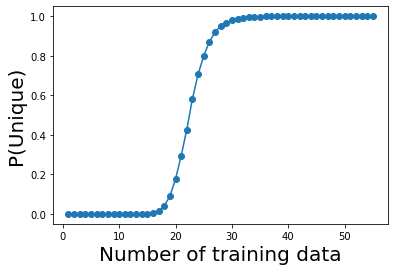

In [13]:
import matplotlib.pyplot as plt
ss = np.array(ss)
x = np.arange(1,all_num+1)
plt.plot(x/55, ss, marker="o")
plt.xlabel("Number of training data",fontsize=20)
plt.ylabel("P(Unique)",fontsize=20)